✅ Data loaded successfully!
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  \
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning   
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers   
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus   
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter   
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez   

   Unnamed: 13  timestamp  status  
0          NaN        NaN     NaN  
1         

C:\Users\avani\AppData\Local\Temp\ipykernel_5784\3989283761.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])



✅ Data cleaned and saved as 'cleaned_starship_data.csv'

Summary statistics:
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4277.000000   4277.000000   4277.000000   4277.000000   4277.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.027384    601.162847   1508.609201    554.357251   1103.913087   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      20.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     79.000000    143.000000     51.000000     83.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  Unnamed: 13  timestamp  status  
count   4277.000000          0.0        0.0     0.0  
mean     310.710031          NaN        NaN     NaN  
std     1235.274606          NaN        NaN     NaN  
min

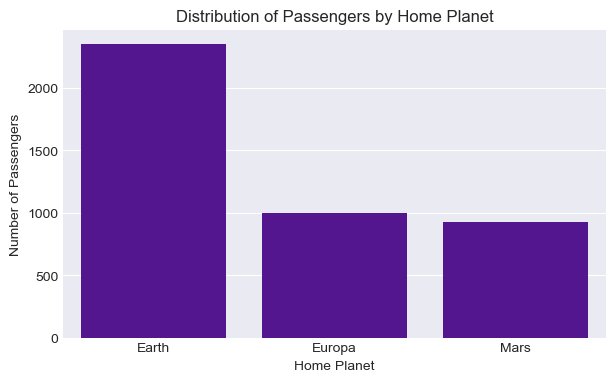

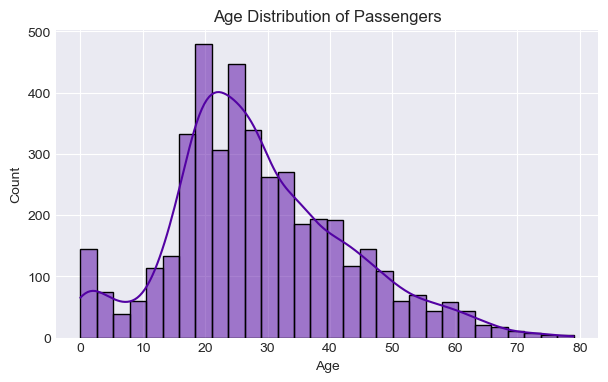

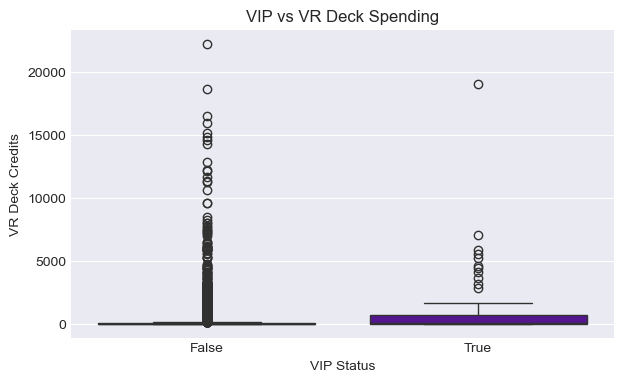

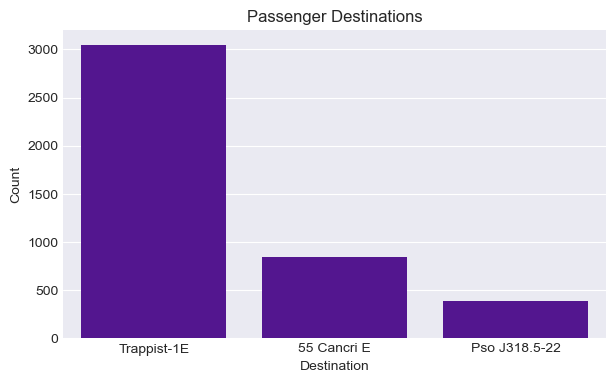

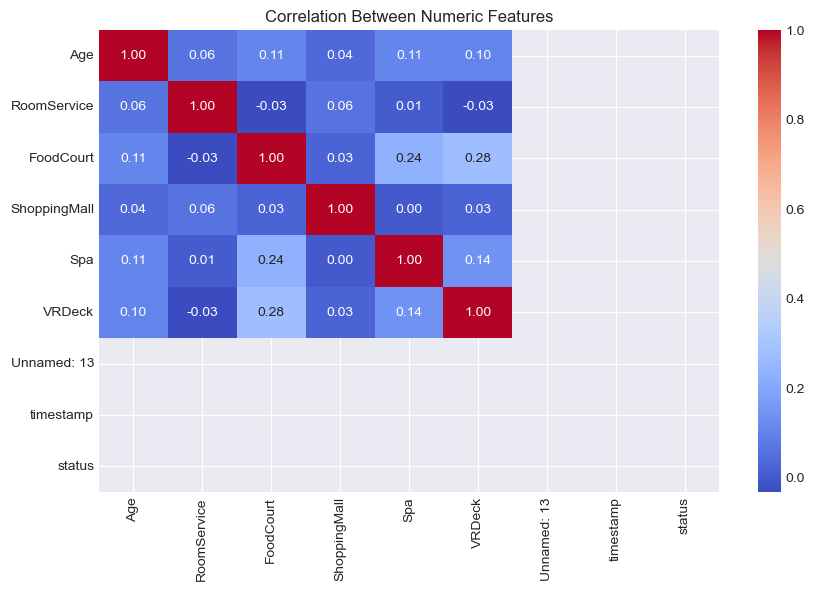


✅ Data Exploration Complete!


In [2]:
# ---------------------------------------------------
# PART TWO: Rescue Across the Rift
# Data Cleaning + Data Exploration
# ---------------------------------------------------

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visuals
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('plasma')

# ---------------------------------------------------
# 1. Load the dataset
# ---------------------------------------------------
df = pd.read_csv("test.csv")   # Make sure your CSV file name matches
print("✅ Data loaded successfully!")
print(df.head())
print(df.info())

# ---------------------------------------------------
# 2. Data Cleaning
# ---------------------------------------------------

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill numeric missing values with column mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical missing values with most frequent value (mode)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Standardize string data (remove spaces and fix capitalization)
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

# Remove duplicates
df = df.drop_duplicates()

# Save cleaned dataset
df.to_csv("cleaned_starship_data.csv", index=False)
print("\n✅ Data cleaned and saved as 'cleaned_starship_data.csv'")

# ---------------------------------------------------
# 3. Data Exploration
# ---------------------------------------------------

# Basic summary
print("\nSummary statistics:")
print(df.describe())

# ---- Plot 1: HomePlanet Distribution ----
plt.figure(figsize=(7,4))
sns.countplot(x='HomePlanet', data=df)
plt.title("Distribution of Passengers by Home Planet")
plt.xlabel("Home Planet")
plt.ylabel("Number of Passengers")
plt.show()

# ---- Plot 2: Age Distribution ----
plt.figure(figsize=(7,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# ---- Plot 3: Spending in VR Deck ----
plt.figure(figsize=(7,4))
sns.boxplot(x='VIP', y='VRDeck', data=df)
plt.title("VIP vs VR Deck Spending")
plt.xlabel("VIP Status")
plt.ylabel("VR Deck Credits")
plt.show()

# ---- Plot 4: Destination Count ----
plt.figure(figsize=(7,4))
sns.countplot(x='Destination', data=df)
plt.title("Passenger Destinations")
plt.xlabel("Destination")
plt.ylabel("Count")
plt.show()

# ---- Plot 5: Correlation Heatmap ----
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Numeric Features")
plt.show()

print("\n✅ Data Exploration Complete!")